In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure
import numpy as np
import matplotlib.pyplot as plt


In [2]:
with MPRester("el3corSTO535RH2iv") as m:
# Structure for material id
    structure = m.get_structure_by_material_id("mp-15793")
    
    

    bandstruct = m.get_bandstructure_by_material_id("mp-15793")



## Bande interdite

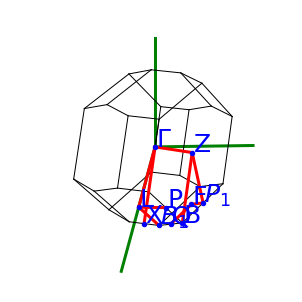

In [3]:
BS = BSPlotter(bandstruct)
Elem = BS.bs_plot_data()
BS.plot_brillouin()


In [16]:
#Détermination de la bande interdite
BI = bandstruct.get_band_gap()
print("Les caractéristiques de la bande interdite sont : ")
print("")
print("Bande interdite directe : \t",BI.get('direct'), "\nCela veut dire quela bande interdite est indirecte et donc que le vecteur d'onde associé au maximum de la bande de valence \nn'est pas le même que celui associé au minimum de la bande de conduction. Ces deux vecteurs d'onde sont %r ."%BI.get("transition"))
print("")
print("Energie de la bande interdite : \t",BI.get('energy'),"\nCette valeur nous montre qu'il s'agit d'un semi-conducteur.")


Les caractéristiques de la bande interdite sont : 

Bande interdite directe : 	 False 
Cela veut dire quela bande interdite est indirecte et donc que le vecteur d'onde associé au maximum de la bande de valence 
n'est pas le même que celui associé au minimum de la bande de conduction. Ces deux vecteurs d'onde sont '(0.031,0.000,-0.031)-F' .

Energie de la bande interdite : 	 1.5013 
Cette valeur nous montre qu'il s'agit d'un semi-conducteur.


In [68]:
E = Elem.get('energy')
pos=Elem.get('distances')

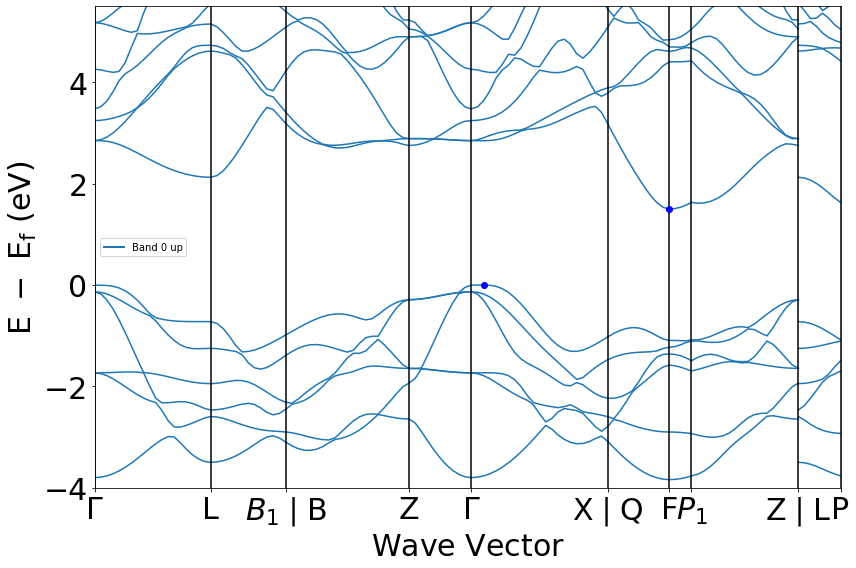

In [83]:
BS.get_plot()
max_val=plt.plot(pos[4][2], E.get('1')[l][11][2], 'bo')
min_cond=plt.plot(pos[5][10], E.get('1')[u][12][10], 'bo')

## Directions de la dernière (première) bande de valence (conduction)

In [70]:
ticks = Elem.get('ticks')
#pos=Elem.get('distances')
Dist = Elem['ticks']['distance']
dist = ([Dist[0],Dist[1],Dist[3],Dist[4],Dist[6],Dist[8],Dist[9],Dist[11],Dist[13],Dist[14]])
#print (dist[-1]-dist[-2])
Dx = np.zeros(9)
for i in range(9):
    Dx[i]=dist[i+1]-dist[i]
#print(Dx)
#E = Elem.get('energy')
#print((E))
#print(bandstruct.get_vbm())#11
#print(bandstruct.get_cbm())#12


delta=np.zeros(9)
for i in range (9):
    delta[i]=E.get('1')[i][11][-1] - E.get('1')[i][11][0]
#print(delta)
pente1=np.zeros(9)
for i in range(9):
    pente1[i]=delta[i]/Dx[i]
#print(pente1)
#4

In [71]:
ymax=-10
for i in range(9):
    if(max(E.get('1')[i][11])>ymax):
        
        ymax=max(E.get('1')[i][11])
        indice_max=np.where((E.get('1')[i][11])==ymax)#2
        l=i#4
#print(indice_max,E.get('1')[l][11][2],l,pos[4][2])

ymin=10

for i in range(9):
    if(min(E.get('1')[i][12])<ymin):
        
        ymin=min(E.get('1')[i][12])
        indice_min=np.where((E.get('1')[i][12])==ymin)#10
        u=i#5
#print(indice_min,E.get('1')[u][12][10],u,pos[5][10])
val_min=E.get('1')[u][12][10]
x_min=pos[5][10]
val_max=E.get('1')[l][11][2]
x_max=pos[4][2]

In [73]:
delta2=np.zeros(9)
for i in range (9):
    delta2[i]=E.get('1')[i][12][-1] - E.get('1')[i][12][0]
#print(delta2)
pente2=np.zeros(9)
for i in range(9):
    pente2[i]=delta2[i]/Dx[i]
#print(pente2)

In [74]:
print("La pente de la dernière bande de valences où il y a le plus de dispersion vaut", pente1[4],". Ceci correspond à la direction Γ/X.(flèche rouge sur le graphe)")
print("")
print("La pente de la dernière bande de valences où il y a le moins de dispersion vaut", pente1[6],". Ceci correspond à la direction F/P1.(flèche verte sur le graphe)")
print("")
print("")
print("La pente de la première bande de conduction où il y a le plus de dispersion vaut", pente2[5],". Ceci correspond à la direction Γ/X.(flèche mauve sur le graphe)")
print("")
print("La pente de la première bande de conduction où il y a le moins de dispersion vaut", pente2[6],". Ceci correspond à la direction F/P1. (flèche noire sur le graphe)")

La pente de la dernière bande de valences où il y a le plus de dispersion vaut -0.965190709541549 . Ceci correspond à la direction Γ/X.(flèche rouge sur le graphe)

La pente de la dernière bande de valences où il y a le moins de dispersion vaut 0.06894628708315041 . Ceci correspond à la direction F/P1.(flèche verte sur le graphe)


La pente de la première bande de conduction où il y a le plus de dispersion vaut -3.521225010666255 . Ceci correspond à la direction Γ/X.(flèche mauve sur le graphe)

La pente de la première bande de conduction où il y a le moins de dispersion vaut 0.7636677730311615 . Ceci correspond à la direction F/P1. (flèche noire sur le graphe)


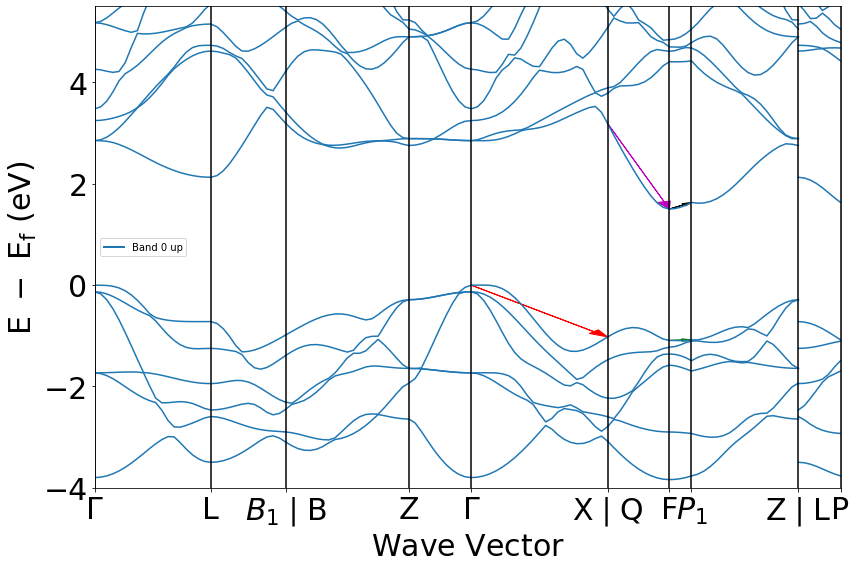

In [75]:
BS.get_plot()
FlechePlusDispVal = plt.arrow(Dist[6], (E.get('1')[4][11])[0], Dx[4], delta[4], color = 'r', head_width = 0.1,length_includes_head=True)
# Flèche représentant la direction pour laquelle la bande de valence présente le moins de dispersion 
FlecheMoinsDispVal =plt.arrow(dist[6], (E.get('1')[6][11])[0], Dx[6], delta[6], color = 'g', head_width = 0.05,length_includes_head=True)
#FlecheMoinsDispVal =plt.arrow(Dist[9], (E.get('1')[6][10])[0], Dx[6]-0.1, pente[6], color = 'g', head_width = 0.1)

FlechePlusDispVal = plt.arrow(dist[5], (E.get('1')[5][12])[0], Dx[5], delta2[5], color = 'm', head_width = 0.1,length_includes_head=True)
FlecheMoinsDispVal =plt.arrow(dist[6], (E.get('1')[6][12])[0], Dx[6], delta2[6], color = 'k', head_width = 0.05,length_includes_head=True)


## Masses effectives

In [76]:
print("La formule pour calculer la masse effective est donnée par")

La formule pour calculer la masse effective est donnée par


$$m^{*}= \frac{{\displaystyle \hbar^{2} }}{\frac{\partial^2 \epsilon}{\partial k^2}}$$

Où $\hbar$ est la constante de planck, $\epsilon$ est l'énergie de la bande électronique, et k un vecteur d'onde.
Afin d'obtenir cette dérivée seconde, nous considérons une dispersion parabolique dont l'équation est donnée par 
$$ y = a * k^{2} + b * k +c$$

Afin d'obtenir les différents coefficients, nous prenons en compte la valeur maximale de la bande de valence (minimale de la bande de conduction).

In [77]:
Pos_max=np.zeros(2)
Pos_max[0]=x_max
Pos_max[1]=val_max
#[{x_max,val_max}]
point=np.zeros(2)
point[0]=dist[4]
point[1]=E.get('1')[4][11][0]
#[{dist[4],E.get('1')[4][11][0]}]

a = (point[1]-Pos_max[1])/((Pos_max[0]-point[0])*(Pos_max[0]-point[0]))
b = -2 * Pos_max[0]*a
c = point[1] - (a*point[0]*point[0]) + 2*(a)*Pos_max[0]*point[0]
hbar=1.054571818E-34



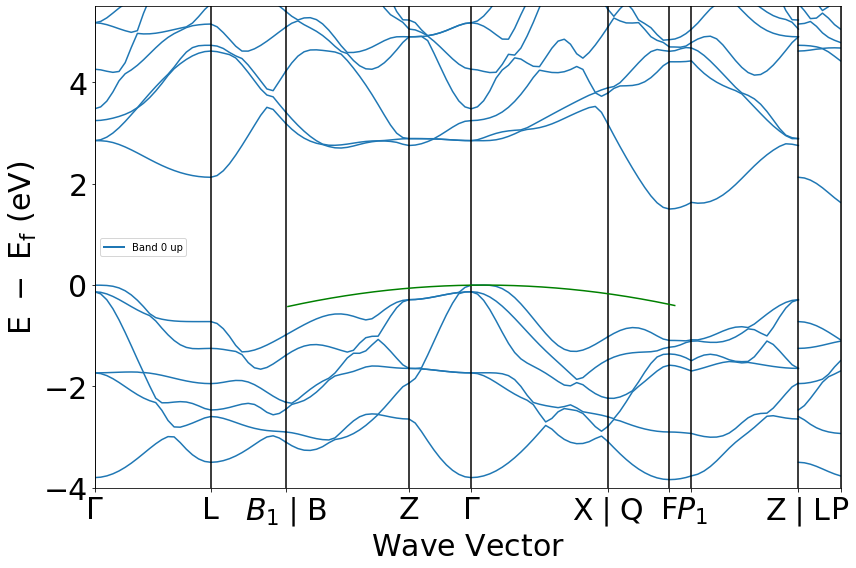

In [78]:
BS.get_plot()

k = np.linspace(1.5,4.5,1000)
y = a*k**2+b*k+c
plt.plot(k,y,color ='g') 

In [79]:
print("Nous savons que la parabole pour la bande de valence passe par le point maximal (qui est donc le sommet de la bande de valence) ainsi que par le point \t",point)
print('\nAvec ces 2 points nous pouvons trouver les constantes a,b et c de l équation de la parabole : y = a * k^2 + b * k + c')
print('a = \t',a)
print('b = \t',b)
print('c = \t',c)
print('\nL équation devient donc y =', a,"k^2 +", b,"k",c)
print("La dérivée seconde est donc y'' = \t", -2*a,"eV*Å^2 =",-2*a* 1.60218E-19*1.0E-20 , "J*m^2")
print('\nLa masse effective de la dernière bande de valence vaut donc m* =',hbar**2/(-2*a* 1.60218E-19*1.0E-20),'kg.')

Nous savons que la parabole pour la bande de valence passe par le point maximal (qui est donc le sommet de la bande de valence) ainsi que par le point 	 [ 2.92176798e+00 -1.70000000e-03]

Avec ces 2 points nous pouvons trouver les constantes a,b et c de l équation de la parabole : y = a * k^2 + b * k + c
a = 	 -0.18361103939178072
b = 	 1.1082726091337922
c = 	 -1.6723778976265717

L équation devient donc y = -0.18361103939178072 k^2 + 1.1082726091337922 k -1.6723778976265717
La dérivée seconde est donc y'' = 	 0.36722207878356145 eV*Å^2 = 5.883558701854465e-40 J*m^2

La masse effective de la dernière bande de valence vaut donc m* = 1.8902194669516776e-29 kg.


In [80]:
Pos_min=np.zeros(2)
Pos_min[0]=x_min
Pos_min[1]=val_min
#[{x_max,val_max}]
point1=np.zeros(2)
point1[0]=dist[5]
point1[1]=E.get('1')[5][12][0]
#[{dist[4],E.get('1')[4][11][0]}]

a2 = (point1[1]-Pos_min[1])/((Pos_min[0]-point1[0])*(Pos_min[0]-point1[0]))
b2 = -2 * Pos_min[0]*a2
c2 = point1[1] - (a2*point1[0]*point1[0]) + 2*a2*Pos_min[0]*point1[0]



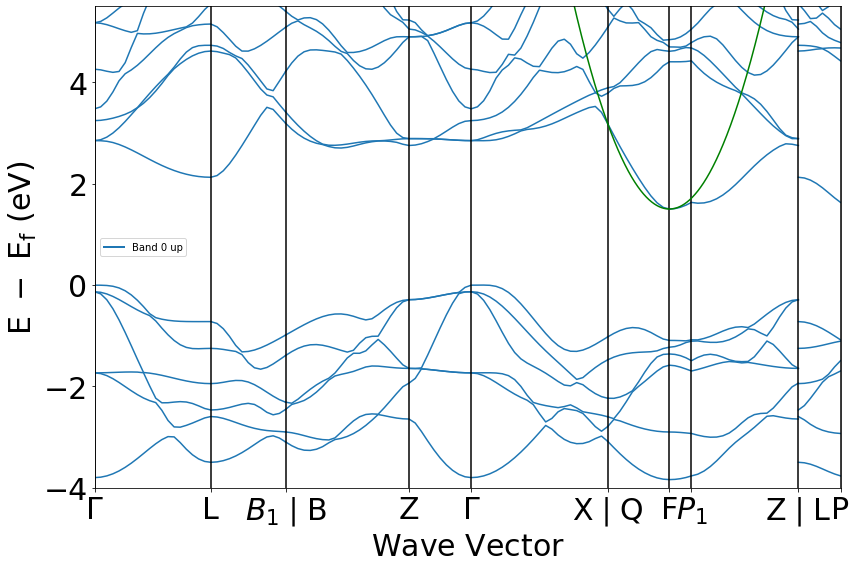

In [81]:
BS.get_plot()

k2 = np.linspace(3,6,1000)
y2 = a2*k2*k2+b2*k2+c2
plt.plot(k2,y2,color ='g')


In [82]:
print("Nous savons que la parabole pour la bande de conduction passe par le point minimal (qui est donc la base de la bande de conduction) ainsi que par le point \t",point1)
print('\nAvec ces 2 points nous pouvons trouver les constantes a,b et c de l équation de la parabole : y = a * k^2 + b * k + c')
print('a = \t',a2)
print('b = \t',b2)
print('c = \t',c2)
print('\nL équation devient donc y =', a2,"k^2 ", b2,"k +",c2)
print("La dérivée seconde est donc y'' = \t", 2*a2,"eV*Å^2 =",2*a2* 1.60218E-19*1.0E-20 , "J*m^2")
print('\nLa masse effective de la première bande de conduction vaut donc m* =',hbar**2/(2*a2* 1.60218E-19*1.0E-20),'kg.')

Nous savons que la parabole pour la bande de conduction passe par le point minimal (qui est donc la base de la bande de conduction) ainsi que par le point 	 [3.98021165 3.1869    ]

Avec ces 2 points nous pouvons trouver les constantes a,b et c de l équation de la parabole : y = a * k^2 + b * k + c
a = 	 7.35585285698954
b = 	 -65.5981525061529
c = 	 147.7493862477988

L équation devient donc y = 7.35585285698954 k^2  -65.5981525061529 k + 147.7493862477988
La dérivée seconde est donc y'' = 	 14.71170571397908 eV*Å^2 = 2.3570800660823004e-38 J*m^2

La masse effective de la première bande de conduction vaut donc m* = 4.718217829436235e-31 kg.
